In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import config as cfg
import seaborn as sns
import ds_functions as ds
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

from data import get_hf_data, get_t_data
from strategies import *

# Heart Failure Dataset

In [2]:
hf_data_raw = get_hf_data()

## Data Balancing

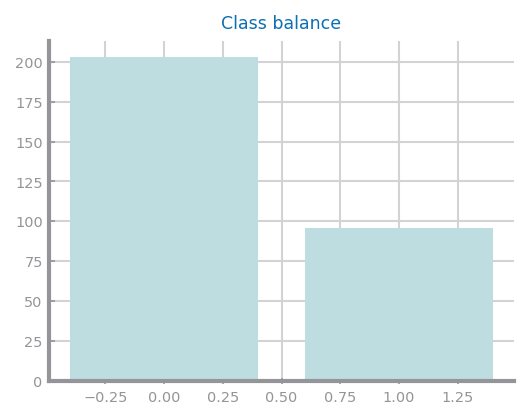

Minority class: 96
Majority class: 203
Proportion: 0.47 : 1


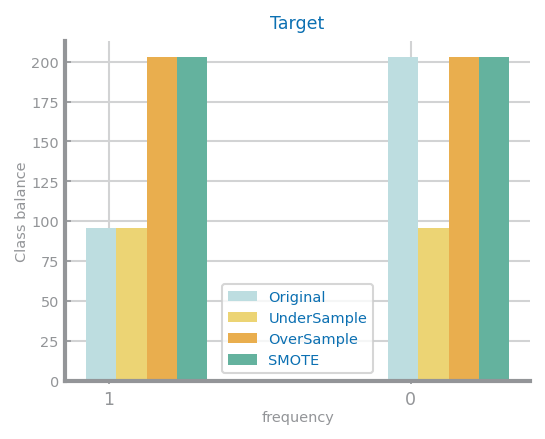

In [3]:
getBalancing(hf_data_raw, 'DEATH_EVENT')

## Try other approaches

In [2]:
hf_data_undersample = get_hf_data(filter_outliers=False, feature_selection=False, scaling="none", balancing="undersample")
hf_data_oversample = get_hf_data(filter_outliers=False, feature_selection=False, scaling="none", balancing="oversample")
hf_data_smote = get_hf_data(filter_outliers=False, feature_selection=False, scaling="none", balancing="smote")

## Gradient Boosting

### With undersample

100%|██████████| 150/150 [00:27<00:00,  5.37it/s]


<Figure size 600x450 with 0 Axes>

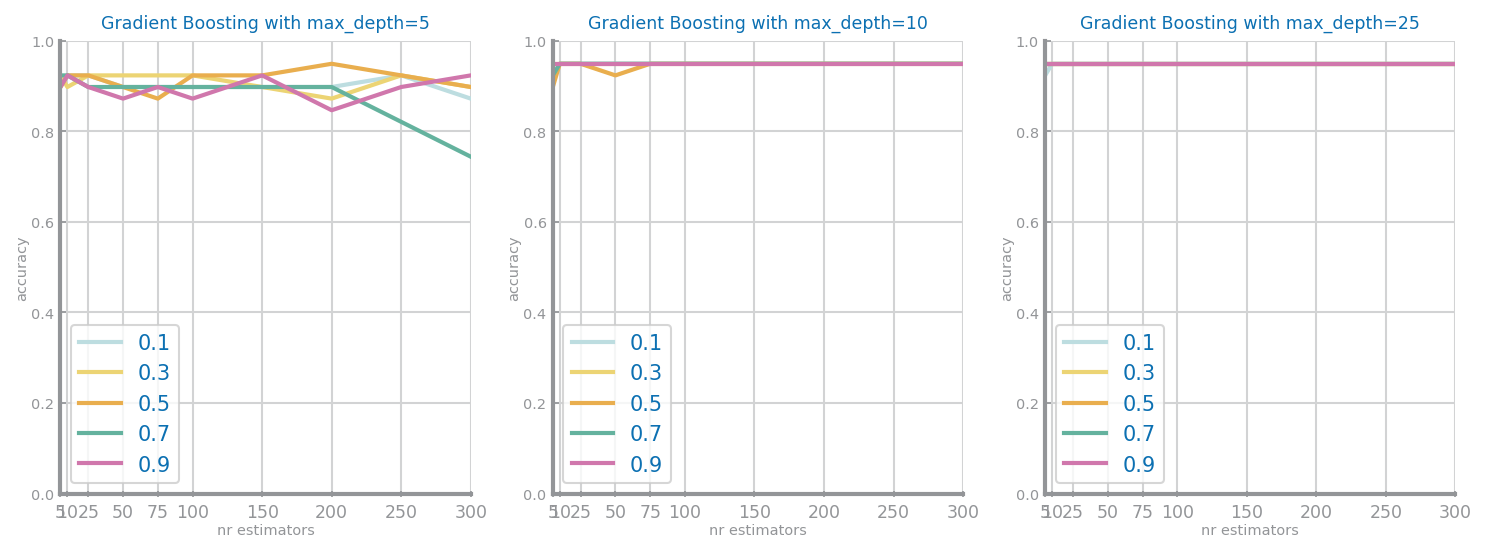

Best results with depth=5, learning rate=0.50 and 200 estimators, with accuracy=0.95


In [3]:
trnX, tstX, y, trnY, tstY, best_tree = gradientBoosting(hf_data_undersample, 'DEATH_EVENT')

In [ ]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

### With oversample

In [ ]:
trnX, tstX, y, trnY, tstY, best_tree = gradientBoosting(hf_data_oversample, 'DEATH_EVENT')

In [ ]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

### With smote

In [ ]:
trnX, tstX, y, trnY, tstY, best_tree = gradientBoosting(hf_data_smote, 'DEATH_EVENT')

In [ ]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

# Heart Failure Dataset

In [9]:
t_data = get_t_data()

## Data Balancing

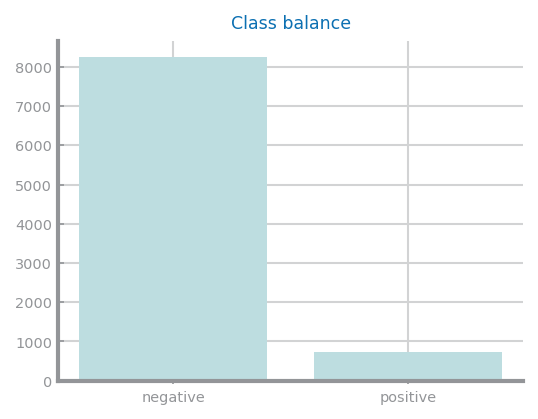

Minority class: 741
Majority class: 8251
Proportion: 0.09 : 1


In [10]:
target_count = t_data['toxic'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

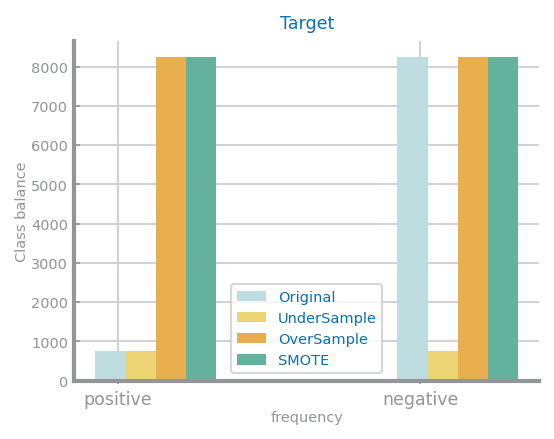

In [11]:
RANDOM_STATE = 42
values = {'Original': [target_count.values[ind_min_class], target_count.values[1-ind_min_class]]}
unbal = t_data.copy()

df_class_min = unbal[unbal['toxic'] == min_class]
df_class_max = unbal[unbal['toxic'] != min_class]

df_under = df_class_max.sample(len(df_class_min))
values['UnderSample'] = [target_count.values[ind_min_class], len(df_under)]

df_over = df_class_min.sample(len(df_class_max), replace=True)
values['OverSample'] = [len(df_over), target_count.values[1-ind_min_class]]

smote = SMOTE(sampling_strategy='minority', random_state=RANDOM_STATE)
y = unbal.pop('toxic').values
X = unbal.values
smote_X, smote_y = smote.fit_sample(X, y)
smote_target_count = pd.Series(smote_y).value_counts()
values['SMOTE'] = [smote_target_count.values[ind_min_class], smote_target_count.values[1-ind_min_class]]

smote = pd.concat([pd.DataFrame(smote_X, columns=unbal.columns), pd.DataFrame(smote_y, columns=['toxic'])], axis=1)

fig = plt.figure()
ds.multiple_bar_chart([target_count.index[ind_min_class], target_count.index[1-ind_min_class]], values,
                      title='Target', xlabel='frequency', ylabel='Class balance')
plt.show()

## Try other approaches

In [2]:
t_data_undersample = get_t_data(feature_selection=False, balancing="undersample")
t_data_oversample = get_t_data(feature_selection=False, balancing="oversample")
t_data_smote = get_t_data(feature_selection=False, balancing="smote")

## Gradient Boosting

(5, 0.1, 5)
(5, 0.1, 10)
(5, 0.1, 25)
(5, 0.1, 50)
(5, 0.1, 75)
(5, 0.3, 5)
(5, 0.3, 10)
(5, 0.3, 25)
(5, 0.3, 50)
(5, 0.3, 75)
(5, 0.5, 5)
(5, 0.5, 10)
(5, 0.5, 25)
(5, 0.5, 50)
(5, 0.5, 75)
(5, 0.7, 5)
(5, 0.7, 10)
(5, 0.7, 25)
(5, 0.7, 50)
(5, 0.7, 75)
(5, 0.9, 5)
(5, 0.9, 10)
(5, 0.9, 25)
(5, 0.9, 50)
(5, 0.9, 75)


<Figure size 600x450 with 0 Axes>

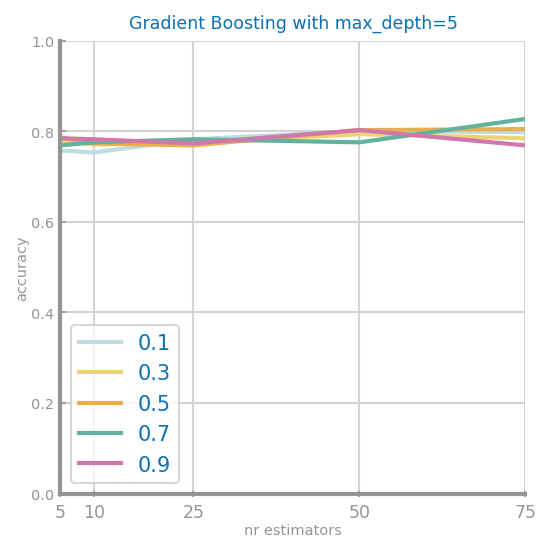

Best results with depth=5, learning rate=0.70 and 75 estimators, with accuracy=0.83


In [3]:
trnX, tstX, y, trnY, tstY, best_tree = gradientBoosting(t_data_undersample, 'toxic', False, True)

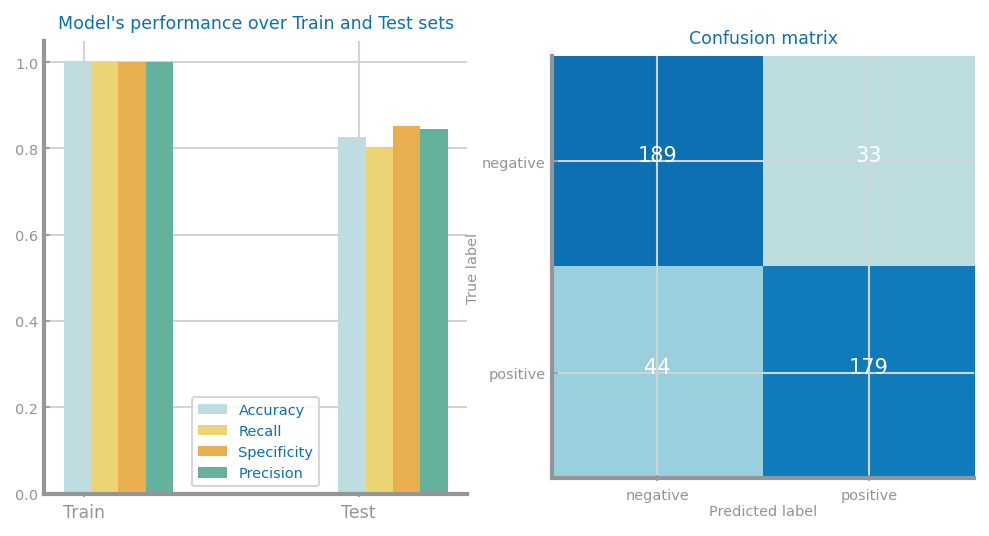

In [4]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

(5, 0.1, 5)
(5, 0.1, 10)
(5, 0.1, 25)
(5, 0.1, 50)
(5, 0.1, 75)
(5, 0.3, 5)
(5, 0.3, 10)
(5, 0.3, 25)
(5, 0.3, 50)
(5, 0.3, 75)
(5, 0.5, 5)
(5, 0.5, 10)
(5, 0.5, 25)
(5, 0.5, 50)
(5, 0.5, 75)
(5, 0.7, 5)
(5, 0.7, 10)
(5, 0.7, 25)
(5, 0.7, 50)
(5, 0.7, 75)
(5, 0.9, 5)
(5, 0.9, 10)
(5, 0.9, 25)
(5, 0.9, 50)
(5, 0.9, 75)


<Figure size 600x450 with 0 Axes>

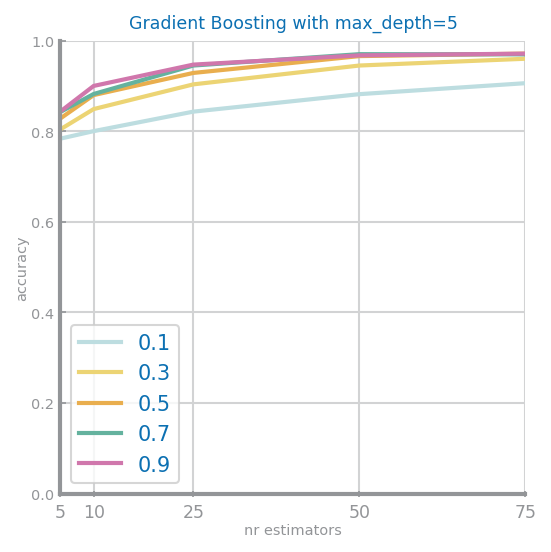

Best results with depth=5, learning rate=0.50 and 75 estimators, with accuracy=0.97


In [5]:
trnX, tstX, y, trnY, tstY, best_tree = gradientBoosting(t_data_oversample, 'toxic', False, True)

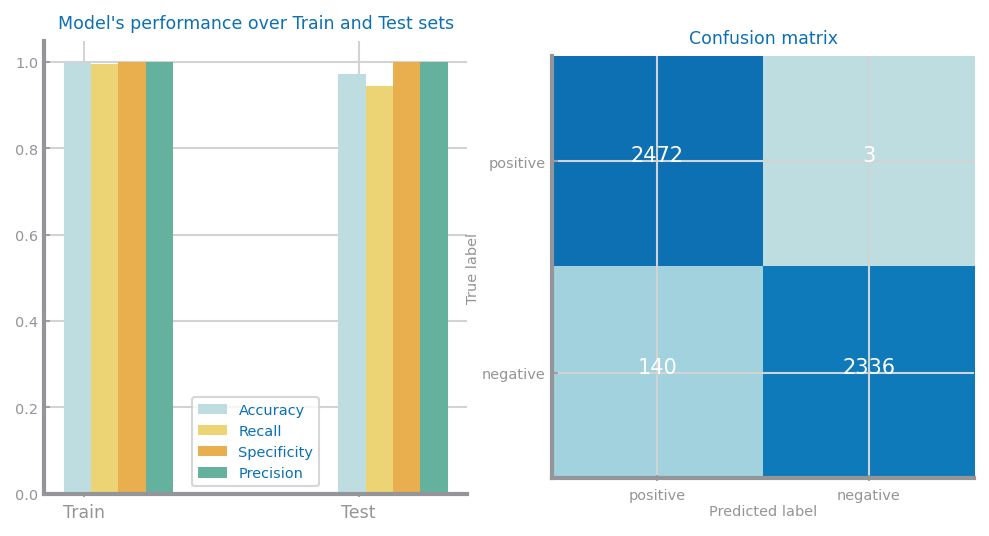

In [6]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

(5, 0.1, 5)
(5, 0.1, 10)
(5, 0.1, 25)
(5, 0.1, 50)
(5, 0.1, 75)
(5, 0.3, 5)
(5, 0.3, 10)
(5, 0.3, 25)
(5, 0.3, 50)
(5, 0.3, 75)
(5, 0.5, 5)
(5, 0.5, 10)
(5, 0.5, 25)
(5, 0.5, 50)
(5, 0.5, 75)
(5, 0.7, 5)
(5, 0.7, 10)
(5, 0.7, 25)
(5, 0.7, 50)
(5, 0.7, 75)
(5, 0.9, 5)
(5, 0.9, 10)
(5, 0.9, 25)
(5, 0.9, 50)
(5, 0.9, 75)


<Figure size 600x450 with 0 Axes>

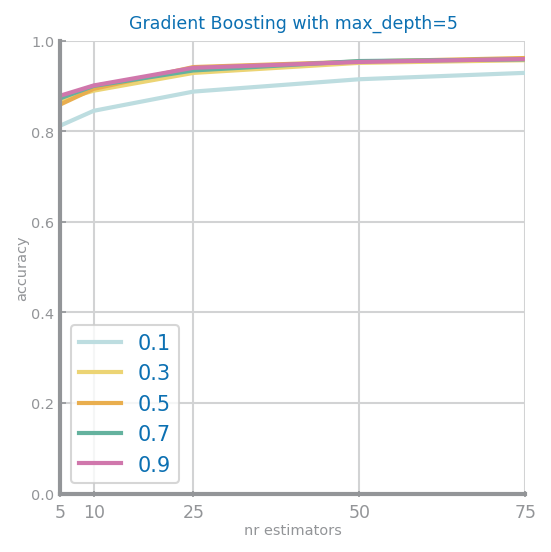

Best results with depth=5, learning rate=0.50 and 75 estimators, with accuracy=0.96


In [7]:
trnX, tstX, y, trnY, tstY, best_tree = gradientBoosting(t_data_smote, 'toxic', False, True)

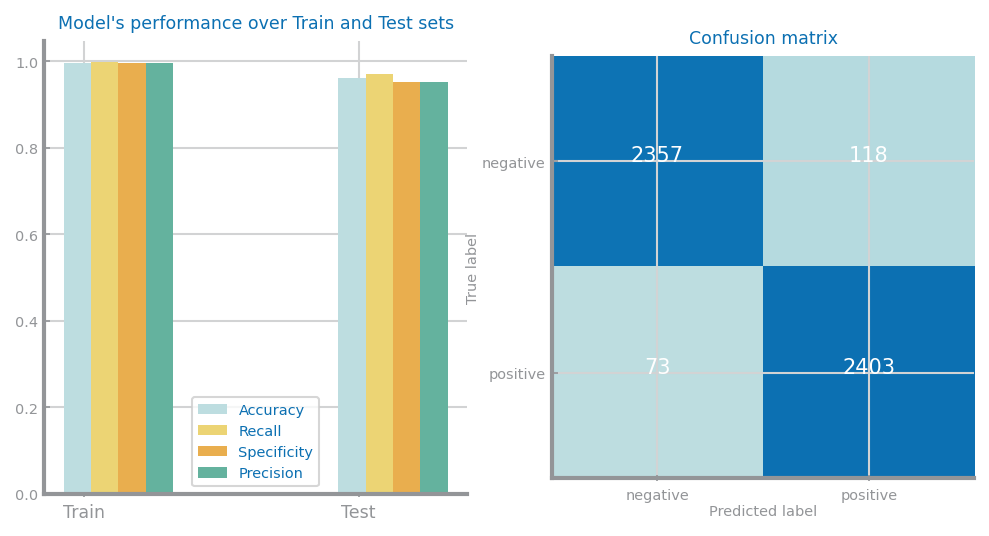

In [8]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)